## Imports

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import category_encoders as ce #pip install category_encoders

In [6]:
train = pd.read_csv('train.csv')
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,our deed are the reason of thi earthquak may a...,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,al resid ask to shelter in place are be notifi...,1
3,6,NaN,NaN,number peopl receiv wildfir evacu order in cal...,1
4,7,NaN,NaN,just got se not thi photo from rubi alaska as ...,1
5,8,NaN,NaN,rockyfir updat california hwi number close in ...,1
6,10,NaN,NaN,flood disast heavi rain caus flash flood of st...,1
7,13,NaN,NaN,i am on top of the hil and i can see a fire in...,1
8,14,NaN,NaN,there is an emerg evacu happen now in the buil...,1
9,15,NaN,NaN,i am afraid that the tornado is come to our area,1


In [7]:
pos_col_text = train.columns.get_loc('text')+1
train.insert(loc=pos_col_text, column='len_text', value=train['text'].iloc[:].str.len())
train.head(10)

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,our deed are the reason of thi earthquak may a...,63,1
1,4,NaN,NaN,forest fire near la rong sask canada,37,1
2,5,NaN,NaN,al resid ask to shelter in place are be notifi...,108,1
3,6,NaN,NaN,number peopl receiv wildfir evacu order in cal...,54,1
4,7,NaN,NaN,just got se not thi photo from rubi alaska as ...,84,1
5,8,NaN,NaN,rockyfir updat california hwi number close in ...,96,1
6,10,NaN,NaN,flood disast heavi rain caus flash flood of st...,81,1
7,13,NaN,NaN,i am on top of the hil and i can see a fire in...,56,1
8,14,NaN,NaN,there is an emerg evacu happen now in the buil...,66,1
9,15,NaN,NaN,i am afraid that the tornado is come to our area,49,1


### Enconding de columnas categóricas

#### Keyword

In [8]:
ce_bin_keyword = ce.BinaryEncoder(cols = ['keyword'])
keyword_encoded = ce_bin_keyword.fit_transform(train['keyword'])

In [9]:
keyword_encoded

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,1
7609,0,0,0,0,0,0,0,0,1
7610,0,0,0,0,0,0,0,0,1
7611,0,0,0,0,0,0,0,0,1


#### Location

In [10]:
ce_bin_location = ce.BinaryEncoder(cols = ['location'])
location_encoded = ce_bin_location.fit_transform(train['location'])

In [11]:
location_encoded 

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,location_10,location_11,location_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,0,0,1
7609,0,0,0,0,0,0,0,0,0,0,0,0,1
7610,0,0,0,0,0,0,0,0,0,0,0,0,1
7611,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Text

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk #pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ben/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1), stop_words='english', tokenizer=nltk.word_tokenize)
tf_idf_data = tf_idf_vec.fit_transform(train['text'])

In [10]:
col_names = tf_idf_vec.get_feature_names()
col_names

['ab',
 'aba',
 'abandon',
 'abandonedp',
 'abbandon',
 'abbott',
 'abbruchsimul',
 'abbswinston',
 'abbyairshow',
 'abc',
 'abcnew',
 'abcnorio',
 'abe',
 'aberdeen',
 'aberdeenfanpag',
 'aberdeenfc',
 'aberystwyth',
 'abha',
 'abia',
 'abil',
 'abject',
 'abl',
 'ablaz',
 'ableg',
 'abninfvet',
 'aboard',
 'abomb',
 'abomin',
 'abort',
 'abov',
 'abq',
 'abrancabalero',
 'absenc',
 'absolut',
 'absolutsumya',
 'abstorm',
 'abstract',
 'absurd',
 'absurdli',
 'abubara',
 'abus',
 'abysmaljoin',
 'ac',
 'acaciapen',
 'academia',
 'acarewornheart',
 'acc',
 'accept',
 'access',
 'accid',
 'accidentali',
 'accidentalpropheci',
 'accionempresa',
 'accompani',
 'accord',
 'accordingli',
 'accou',
 'account',
 'accuraci',
 'accus',
 'accustom',
 'acd',
 'acdelco',
 'ace',
 'acebab',
 'acebreakingnew',
 'acenewsdesk',
 'aceorg',
 'acess',
 'ach',
 'achedin',
 'achiev',
 'achievem',
 'achimota',
 'acid',
 'acmilan',
 'acn',
 'acoust',
 'acousticmaloley',
 'acquiesc',
 'acquir',
 'acquisit',
 

In [11]:
tf_idf_array = tf_idf_data.toarray()
text_encoded = pd.DataFrame(tf_idf_array, columns=col_names)

In [12]:
text_encoded

,ab,aba,abandon,abandonedp,abbandon,abbott,abbruchsimul,abbswinston,abbyairshow,abc,...,zonewolf,zoom,zotar,zouma,zouryart,zrnf,zss,zumiez,zurich,zxatheti
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Result

In [57]:
text_encoded = pd.read_csv('train_text.csv')

In [13]:
text_encoded

,sum,max,min
0,2.539967,0.504012,0.206936
1,2.387767,0.520764,0.302012
2,3.925010,0.585124,0.153758
3,2.515355,0.574226,0.150085
4,3.069700,0.436824,0.179350
...,...,...,...
7608,2.623510,0.439867,0.298497
7609,2.937583,0.447507,0.250121
7610,4.698983,0.629740,0.366487
7611,4.510680,0.531384,0.157769


In [14]:
aux = keyword_encoded.join(other=location_encoded, how='inner')
aux = text_encoded.join(other=aux, how='inner')
train_set = aux.join(other=train[['id', 'len_text', 'target']], how='inner', lsuffix='_')

In [15]:
train_set.head(10)

,sum,max,min,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,...,location_6,location_7,location_8,location_9,location_10,location_11,location_12,id,len_text,target
0,2.539967,0.504012,0.206936,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,63,1
1,2.387767,0.520764,0.302012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,37,1
2,3.925010,0.585124,0.153758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,108,1
3,2.515355,0.574226,0.150085,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,54,1
4,3.069700,0.436824,0.179350,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7,84,1
5,3.196590,0.415266,0.100400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8,96,1
6,3.652190,0.421539,0.211922,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,10,81,1
7,1.412882,0.737116,0.675766,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13,56,1
8,2.220835,0.528860,0.395912,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,14,66,1
9,1.966376,0.639305,0.391599,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,15,49,1


### Random Forest

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X, y = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [83]:
X_train = X_train.drop('keyword_0', axis=1)

In [85]:
X_test = X_test.drop('keyword_0', axis=1)

### Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [20, 50, 70, 100, 150, 200, 300]
max_features = ['auto'] #'log2'
max_depth = [20, 50, 70]
min_samples_split = [5, 20, 50, 100]
min_samples_leaf = [20]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [21]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_search, n_iter = 100, cv = 7,\
                               random_state=111)

In [22]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [20, 50, 70, 100, 1000,
                                                      None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [5, 20, 50],
                                        'n_estimators': [20, 50, 70, 100, 150,
                                                         200, 300, 500, 1000]},
                   random_state=111)

In [23]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 20,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 70}

In [25]:
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=20, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.825651


In [86]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=70, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.844266


In [60]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=30, min_samples_leaf=5, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.828033


In [65]:
rf_model.feature_importances_.argmax()

25

In [66]:
X_train.columns

Index(['sum', 'max', 'min', 'keyword_0', 'keyword_1', 'keyword_2', 'keyword_3',
       'keyword_4', 'keyword_5', 'keyword_6', 'keyword_7', 'keyword_8',
       'location_0', 'location_1', 'location_2', 'location_3', 'location_4',
       'location_5', 'location_6', 'location_7', 'location_8', 'location_9',
       'location_10', 'location_11', 'location_12', 'id', 'len_text'],
      dtype='object')

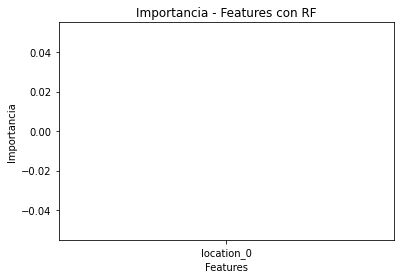

In [87]:
plt.bar(X_train.columns[rf_model.feature_importances_.argmin()], rf_model.feature_importances_.min())
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

### Test

In [63]:
test_set = pd.read_csv('test.csv')

In [68]:
test_set.head(10)

,id,keyword,location,text
0,0,NaN,NaN,just happen a teribl car crash
1,2,NaN,NaN,heard about earthquak is differ not citi stay ...
2,3,NaN,NaN,there is a forest fire at spot pond gees are f...
3,9,NaN,NaN,apocalyps light spokan wildfir
4,11,NaN,NaN,typhoon soudelor kil number in china and taiwan
5,12,NaN,NaN,we are shake it is an earthquak
6,21,NaN,NaN,they would probabl stil show more life than ar...
7,22,NaN,NaN,hey how are you
8,27,NaN,NaN,what a nice hat
9,29,NaN,NaN,fuck off


In [69]:
ce_bin_keyword = ce.BinaryEncoder(cols = ['keyword'])
keyword_encoded = ce_bin_keyword.fit_transform(test_set['keyword'])

In [70]:
ce_bin_location = ce.BinaryEncoder(cols = ['location'])
location_encoded = ce_bin_location.fit_transform(test_set['location'])

In [71]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2143 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [72]:
pos_col_text = test_set.columns.get_loc('text')+1
test_set.insert(loc=pos_col_text, column='len_text', value=test_set['text'].iloc[:].str.len())
test_set.head(10)

,id,keyword,location,text,len_text
0,0,NaN,NaN,just happen a teribl car crash,31
1,2,NaN,NaN,heard about earthquak is differ not citi stay ...,59
2,3,NaN,NaN,there is a forest fire at spot pond gees are f...,89
3,9,NaN,NaN,apocalyps light spokan wildfir,31
4,11,NaN,NaN,typhoon soudelor kil number in china and taiwan,48
5,12,NaN,NaN,we are shake it is an earthquak,32
6,21,NaN,NaN,they would probabl stil show more life than ar...,70
7,22,NaN,NaN,hey how are you,16
8,27,NaN,NaN,what a nice hat,16
9,29,NaN,NaN,fuck off,9


In [83]:
tf_idf_data = tf_idf_vec.fit_transform(test_set['text'])

In [84]:
col_names = tf_idf_vec.get_feature_names()

In [85]:
tf_idf_array = tf_idf_data.toarray()

In [86]:
tf_idf_df = pd.DataFrame(tf_idf_array, columns=col_names)

In [73]:
text_encoded = pd.read_csv('test_text.csv')

In [74]:
aux = keyword_encoded.join(other=location_encoded, how='inner')
aux = text_encoded.join(other=aux, how='inner')
test_set = aux.join(other=test_set[['id', 'len_text']], how='inner', lsuffix='_')

In [75]:
test_set.head(10)

,sum,max,min,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,...,location_4,location_5,location_6,location_7,location_8,location_9,location_10,location_11,id,len_text
0,1.979137,0.615103,0.424578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,31
1,2.638767,0.426320,0.342961,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,59
2,3.217465,0.410331,0.181811,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,89
3,1.958828,0.662541,0.407703,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,9,31
4,2.346990,0.524219,0.151011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,11,48
5,1.387471,0.830597,0.556874,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,12,32
6,3.254028,0.700242,0.201604,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,21,70
7,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,22,16
8,1.413128,0.734261,0.678867,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,27,16
9,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,29,9


# PROBAR CON BEST_PARAMS

In [88]:
preds = rf_model.predict(test_set)
preds

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
print(len(preds))
test_set['target'] = preds
test_set[['id', 'target']]

3263


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [95]:
test_set[['id', 'target']].to_csv('result.csv', header=True, index=False)